# Домашнее задание

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

# загружаем данные с цветками iris’а в датафрейм
data_iris = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# оставляем два признака - sepal_length и sepal_width и целевую переменную - variety
df_iris = data_iris.iloc[:,[0,1]]
df_iris_class = iris.target

In [3]:
# разделяем данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_iris, df_iris_class, test_size=0.25)

In [4]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

# определяем точность прогноза 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8421052631578947

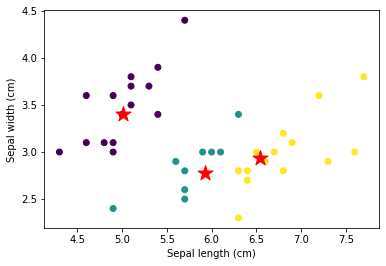

In [15]:
# визуализируем предсказания для тестовой выборки и центры классов
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_pred)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=250, marker='*')

In [6]:
# отбросим целевую переменную и оставим только два признака - sepal_length и sepal_width
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_iris)

In [7]:
# подбираем оптимальное число кластеров для алгоритма kmeans
from sklearn.cluster import KMeans

# строим график локтя
k_inertia = []
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_scaled)
    k_inertia.append(clf_kmeans.inertia_)

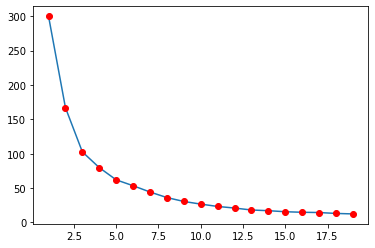

In [8]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Решаем, что 3 кластера - наиболее оптимальный вариант

In [9]:
# визуализируем полученную кластеризацию
kmeans = KMeans(n_clusters=3)

clusters = kmeans.fit_predict(df_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

Text(0, 0.5, 'Sepal width (cm)')

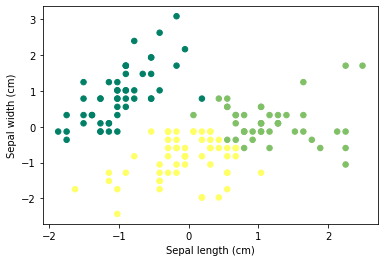

In [12]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], cmap='summer', c=clusters, s=30)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')